Consider heart disease predication problem. Apply all the machine learning algorithms that you have learnt in the past weeks, and compare their performances.

a. Report all the pre-processing steps

b. Plot confusion matrix for all the algorithms

c. You may also try applying PCA and check the performance changes.

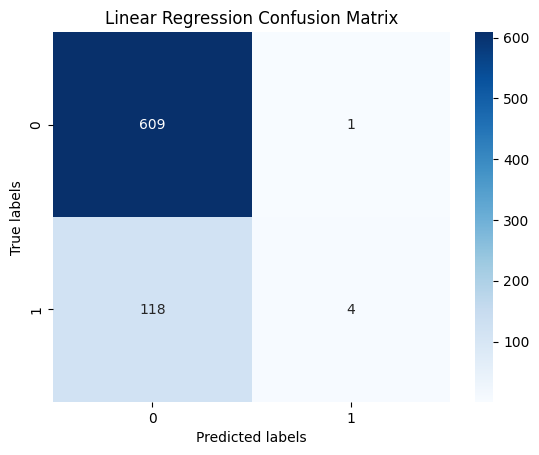

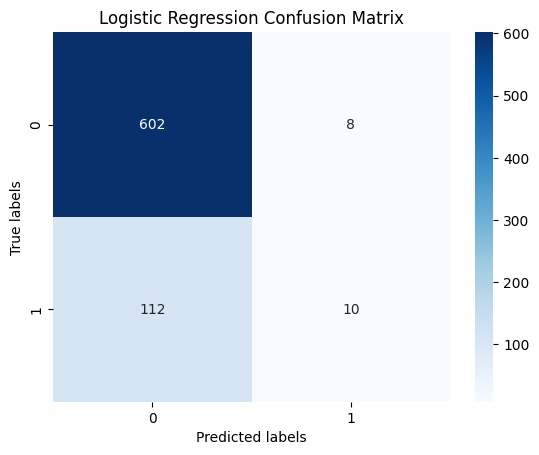

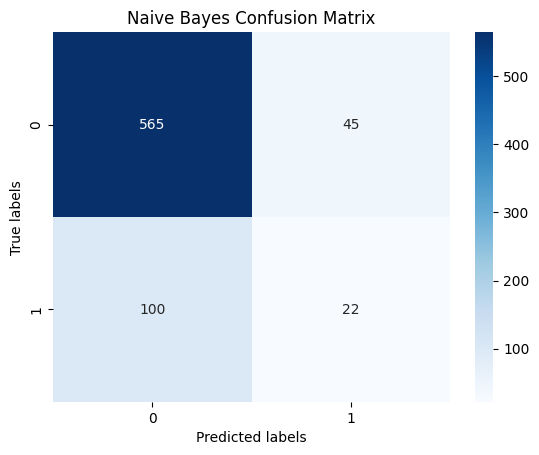

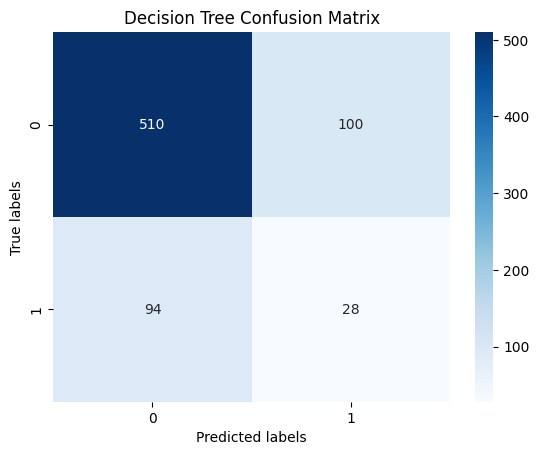

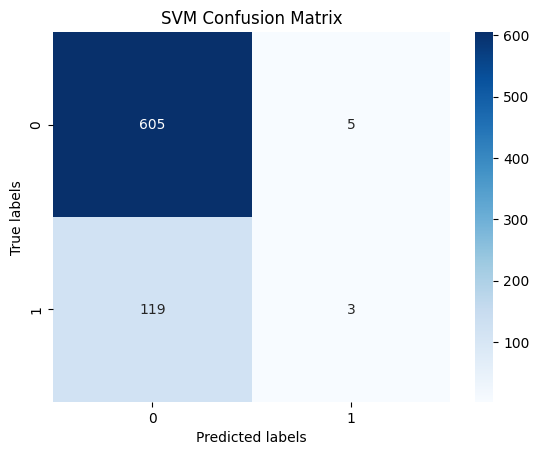

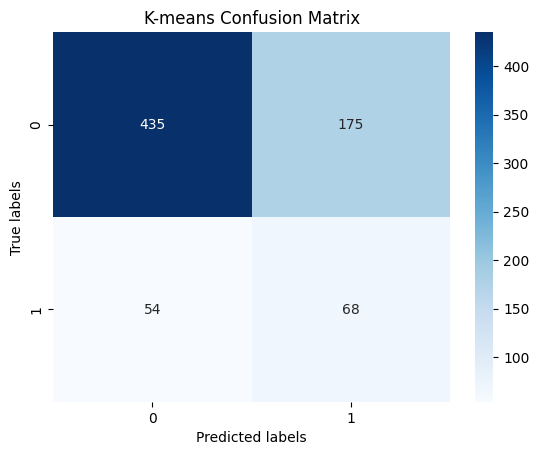

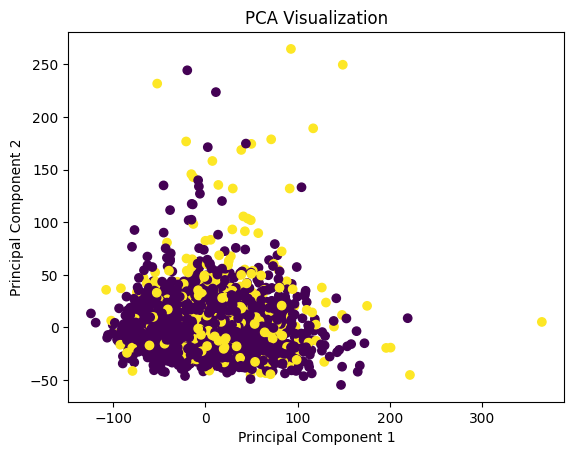

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('heart.csv')

# Data preprocessing
# Handle missing values
df = df.dropna()  # Drop rows with missing values

# Encode categorical variables
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])

# Splitting into features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test)

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

# Cluster Analysis using K-means
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X_train)
kmeans_predictions = kmeans.predict(X_test)

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Plot confusion matrix for each algorithm
plot_confusion_matrix(y_test, linear_reg_predictions.round(), 'Linear Regression Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, logistic_reg_predictions, 'Logistic Regression Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, naive_bayes_predictions, 'Naive Bayes Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, decision_tree_predictions, 'Decision Tree Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, svm_predictions, 'SVM Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, kmeans_predictions, 'K-means Confusion Matrix')
plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()